## COG403: Problem 2 of Problem Set 2: Semantic Networks

### All 3 problems for Problem Set 2 Due 1 November 2018, 2 pm

In this question you will be building and experimenting with a semantic network based on the Small World of Words data, to do a partial replication of the Abbott et al. (2015) experiments on a larger free association data set. To build the graph for the semantic network, we will be using the Python library `networkx`. Below are some examples of how to use this library.

In [2]:
import networkx as nx
from provided_functions import plot_graph

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# initialize graph
example_graph = nx.DiGraph()

# add nodes
example_graph.add_node('a')
example_graph.add_nodes_from(['b', 'c', 'd'])

# add edges
example_graph.add_edge('a', 'b', weight=0.1)
example_graph.add_edge('a', 'c', weight=0.2)
example_graph.add_edge('c', 'd', weight=0.1)
example_graph.add_edge('a', 'd', weight=0.4)

print("example_graph.nodes() => {}".format(example_graph.nodes()))
print("example_graph.edges() => {}".format(example_graph.edges()))
print("'a' in example_graph => {}".format('a' in example_graph))
print("example_graph['a'] => {}".format(example_graph['a']))

# use provided function to plot graph
plot_graph(example_graph)

example_graph.nodes() => ['a', 'b', 'c', 'd']
example_graph.edges() => [('a', 'b'), ('a', 'c'), ('a', 'd'), ('c', 'd')]
'a' in example_graph => True
example_graph['a'] => {'b': {'weight': 0.1}, 'c': {'weight': 0.2}, 'd': {'weight': 0.4}}


### (a)

Write a function to build a semantic network from the Small World of Words data using `networkx.DiGraph`. Call your function `get_swow_graph` and write it according to the specifications below. Print a list of all the node labels of nodes that *dog* has an outgoing edge to, as well as the weight of each edge.

In [44]:
from data.animals import ANIMAL_TO_CATEGORIES
import pandas as pd
import csv
import numpy as np

SWOW_FILE = 'data/SWOW-EN.R100.csv'

import csv
def get_swow_graph(node_threshold=5):
    """
    node_threshold: int -- the number of times a word must occur in the SWOW data to be 
    added as a node to your graph.
    
    Generates a directed, weighted networkx.DiGraph where:
        1. Nodes represent cues and responses from the SWOW data that occur at least node_threhsold times.
           Note: the word 'NA' should not occur as a node.
        2. Outgoing edges from each node sum to 1. These should be proportional to the number of times
           each node occurs as a response to the cue associated with the given node.
        3. The node 'animal' is treated a special case. The outgoing edges from the node 'animal' should
           have a uniform probability over all cues in the SWOW data that are keys in the dict
           ANIMAL_TO_CATEGORIES in the data/animals.py file.
    """
    
    graph_dict = dict()
    
    graph = nx.DiGraph()

    df = pd.read_csv(SWOW_FILE)
    
    
    #TODO: Change index ceiling
    
    for index in df.index:
        
        responses = []
        
        cue = df['cue'].iloc[index]
        
        if cue not in graph_dict:
            graph_dict[cue] = [dict(), 1]
        else:
            graph_dict[cue][1] += 1
        
        responses.append(df['R1'].iloc[index])
        responses.append(df['R2'].iloc[index])
        responses.append(df['R3'].iloc[index])
                
        for response in responses:
            
            if response is np.nan:
                continue
            
            if response not in graph_dict[cue][0]:
                graph_dict[cue][0][response] = 1
            else:
                graph_dict[cue][0][response] += 1
    
    for cue in graph_dict:
        if graph_dict[cue][1] >= 5 or cue is np.nan:
            graph.add_node(cue)
        
        if cue == 'animal':
            count = 0

            for re in graph_dict[cue][0]:
                if re in ANIMAL_TO_CATEGORIES:
                    count += 1

            for re in graph_dict[cue][0]:
                if re in ANIMAL_TO_CATEGORIES:
                    graph.add_node(re)
                    edge_weight = (1 / count)
                    graph.add_edge(cue, re, weight=edge_weight)
        
        else:
            weight_sum = 0

            for re in graph_dict[cue][0]:
                if graph_dict[cue][0][re] >= 5 and re in graph_dict:
                    weight_sum += graph_dict[cue][0][re]

            for re in graph_dict[cue][0]:
                if graph_dict[cue][0][re] >= 5 and re in graph_dict:
                    graph.add_node(re)
                    edge_weight = (graph_dict[cue][0][re]) / weight_sum
                    graph.add_edge(cue, re, weight = edge_weight)
                    
    return graph

graph = get_swow_graph()

print(graph['dog'])

{'bark': {'weight': 0.06837606837606838}, 'cat': {'weight': 0.4358974358974359}, 'bone': {'weight': 0.06837606837606838}, 'puppy': {'weight': 0.08547008547008547}, 'friend': {'weight': 0.1282051282051282}, 'animal': {'weight': 0.06837606837606838}, 'pet': {'weight': 0.1452991452991453}}


### (b)

In this step, you will visualize your graph using the function `plot_graph` in `provided_functions.py`. Because the actual graph has 10,000 nodes, we will visualize a portion of the graph. Write a function `get_subgraph` based on the specifications below. Call `get_subgraph` on your graph with three start nodes: *dog*, *turtle*, and *animal*. For *dog* and *turtle*, use `length=2` and `threshold=0.05`. For *animal*, use `length=1` and `threshold=0`. Call `plot_graph` on each subgraph.

Hint: use the `subgraph` method of networkx graphs.

Note: By default, the `plot_graph` function plots a graph as undirected. For your graphs for this question, please use the default to print them without the arrows. If you are curious and want to experiment, you can make it show the arrows by setting `arrows=True`. The reason it's set to `False` by default is that the way `matplotlib` renders the arrows decreases the interpretability of the graph.

In [55]:
graph = get_swow_graph()

dog


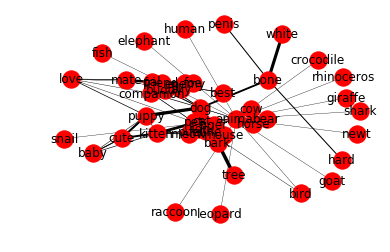

turtle


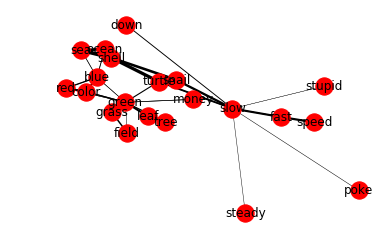

animal


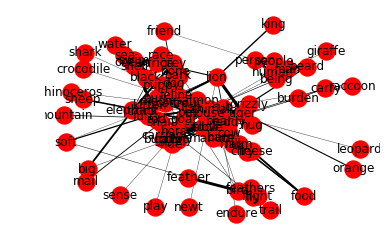

In [59]:
from provided_functions import plot_graph
 
def get_subgraph(G, start, length=2, threshold=0.05):
    """
    G: networkx.DiGraph -- semantic network of SWOW data
    start: str -- name of node to start with
    length: int -- the maximum distance a node can be from start to be included in the result.
        The length of a path through the graph is the number of edges needed to get from
        the start node to the end node (e.g. the path from A->B->C is 2).
    threshold: float -- the minimum edge weight required for an edge to be added to the graph
    
    Return a subgraph of G based on a search starting at start. Only include nodes in your graph that 
    have a distance of length or less from your start node. When searching, only add nodes that are
    connected to your graph by an edge with weight threshold or higher.
    """
    
    neighbour_dict = G[start]
    visited_nodes = [start]
    
    for neighbour in neighbour_dict:
        if neighbour_dict[neighbour]['weight'] >= threshold:
            visited_nodes.append(neighbour)
    
    visited_nodes_2 = []
    
    for i in range(length):
        for node in visited_nodes[1:]:
            neighbour_dict = G[node]
            
            for neighbour in neighbour_dict:
                if neighbour in visited_nodes or neighbour in visited_nodes_2:
                    pass
                elif neighbour_dict[neighbour]['weight'] >= threshold:
                    visited_nodes_2.append(neighbour)
                    
    subgraph = list(set().union(visited_nodes, visited_nodes_2))
    
    H = G.subgraph(subgraph)
    plot_graph(H)
    return H
    
for start in ['dog', 'turtle', 'animal']:
    print(start)
    if start == 'animal':
        get_subgraph(graph, start, 1, 0)
    else:
        get_subgraph(graph,start)

### (c)

Write two functions `get_most_likely_walk` and `get_least_likely_walk` that find the most and least likely walks from a given start node. Implement your functions according to the docstrings below.

Call your functions with the graph from part a. In both cases, set `start = 'dog'` and `walk_length = 10`.

In [70]:
def get_most_likely_walk(G, start, walk_length):
    """
    G: networkx.DiGraph -- semantic network of SWOW data
    start: str -- name of node to start with
    walk_length: the length of the walk to return.
    
    Return a list of length walk_length representing a walk. Do not include start in your
    result. Each node in your walk should be most likely node given the previous node. In
    other words, it should be the node that the previous node has the highest weighted
    outgoing edge to.
    
    Do not allow repeats in your walk. For example, say 'fox' is your start node and
    'den' is the most likely node to follow 'fox'. Even if 'fox' is also the most
    likely node to follow 'den', it should not be revisited after we've seen it. In this case,
    you should select the second highest weighted edge.
    """
    
    walked_list = [start]
    
    current_node = start
    
    for step in range(walk_length):        
        neighbor_dict = G[current_node]
        
        
        max_weight = None
        max_node = None
        
        for neighbor in neighbor_dict:
            if (neighbor not in walked_list) and ((max_weight is None)
                                                 or neighbor_dict[neighbor]['weight'] > max_weight):
                max_weight = neighbor_dict[neighbor]['weight']
                max_node = neighbor
        if max_node is None:
            break
        else:
            walked_list.append(max_node)
            current_node = max_node
    return walked_list

def get_least_likely_walk(G, start, walk_length):
    """
    G: networkx.DiGraph -- semantic network of SWOW data
    start: str -- name of node to start with
    walk_length: the length of the walk to return.
    
    Return a list of length walk_length representing a walk. Do not include start in your
    result. Each node in your walk should be the least likely node that the previous node has an
    outgoing edge to. (Note that there will be nodes that have a zero probability given
    the previous node, and are not connected to the previous node at all. These should
    not be included.)
    
    Do not allow repeats in your walk. For example, say 'fox' is your start node and
    'rock' is the least likely node to follow 'fox'. Even if 'fox' is also the least
    likely node to follow 'rock', it should not be revisited after we've seen it. In
    this case, you should select the second lowest weighted edge.
    """
    
    walked_list = [start]
    
    current_node = start
    
    for step in range(walk_length):
        
        neighbor_dict = G[current_node]
        
        
        min_weight = None
        min_node = None
        
        
        
        for neighbor in neighbor_dict:
            if (neighbor not in walked_list) and (min_weight is None or
                                                  (neighbor_dict[neighbor]['weight'] <= min_weight)):
    
                min_weight = neighbor_dict[neighbor]['weight']
                min_node = neighbor

        if min_node is None:
            break
        else:
            current_node = min_node
            walked_list.append(min_node)
    return walked_list

print('Most Likely Walk:')
print(get_most_likely_walk(graph, 'dog', 10))
print('Least Likely Walk:')
print(get_least_likely_walk(graph, 'dog', 10))

Most Likely Walk:
['dog', 'cat', 'feline', 'lion', 'tiger', 'orange', 'fruit', 'apple', 'red', 'blue', 'sky']
Least Likely Walk:
['dog', 'animal', 'newt']


### (d)

Write a function `weighted_random_walk` to generate a random walk of length `walk_length` starting at node `start`. The probability of choosing the next node at each step in the walk should be based on your edge weights. You can implement this using `np.random.choice` (take a look at the documentation for the parameter `p`, which allows you to pass a list of weighted probabilities for the items to select from). These random walks (unlike in part c above) should allow revisiting nodes that have been visited before (since this is allowed in the Abbott et al. work).

Your function should return a list of strings representing nodes visited. Implement your function according to the docstring below.

Print the list of strings for a sample walk using the graph from part a with `start = 'animal'` and `walk_length = 50`.

In [73]:
import numpy as np

def weighted_recursion(G, start, walk_length):
    if walk_length == 0:
        return [start]
    else:
        
        visited_nodes = [start]
        
        neighbour_dict = G[start]
        
        neighbour_list = []
        neighbour_weights = []
        
        for neighbour in neighbour_dict:
            neighbour_list.append(neighbour)
            neighbour_weights.append(neighbour_dict[neighbour]['weight'])
        
        
        if len(neighbour_list) == 0:
            return [start]
        
        next_node = np.random.choice(neighbour_list, 1, neighbour_weights)
        
        next_node = next_node[0]
                
        tmp_list = weighted_recursion(G, next_node, walk_length - 1)
        
        for item in tmp_list:
            visited_nodes.append(item)
        
        
        return visited_nodes

def weighted_random_walk(G, start, walk_length):
    """
    G: networkx.DiGraph -- semantic network of SWOW data
    start: str -- name of node to start with
    walk_length: the length of the walk to return.
    
    Return a list of length walk_length representing a walk. Do not include start in your
    result. Each node in your walk should be randomly selected based on the weights of the
    outgoing edges of the previous node. A node can be visited more than once.
    """
    
    path = weighted_recursion(G, start, walk_length)
    
    del path[0]
    
    return path
        
        
print(weighted_random_walk(graph, 'animal', 50))

['lion', 'Africa', 'desert', 'arid', 'desert', 'dry', 'cleaning', 'house', 'roof', 'house', 'comfort', 'food', 'drink', 'water', 'clean', 'fresh', 'prince', 'royalty', 'king', 'prince', 'king', 'throne', 'royalty', 'crown', 'king', 'monarch', 'king', 'ruler', 'measure', 'amount', 'quantity', 'amount', 'quantity', 'amount', 'sum', 'math', 'calculus', 'math', 'algebra', 'equation', 'algebra', 'calculus', 'algebra', 'equation', 'equal', 'same', 'old', 'man', 'husband', 'wife']


### (e)

Write a function `get_animals_and_IRT` according to the docstring below. Your function should return a tuple of (description, animal_list), where:
 * description is a string description. Each line should include a valid `item`, as well as the `steps` between the item and the previous item (ie, the nodes on the path between each pair of responses). A response is a valid item if its label is in `ANIMAL_TO_CATEGORIES` (defined in `data/animals.py`) and it has not been seen previously in the walk.
 * animal_list is a list of tuples of `(item, IRT)`, where item is a valid item, and the IRT is the interitem response time, as defined in Abbott et al.
 
For example, the walk `[animal, dog, pet, cat, dog, bone, dinosaur, lizard]` 

The description would be:

`item: dog       steps:
 item: cat       steps: pet
 item: lizard    steps: dog, bone, dinosaur`

And the animal_list would be:
`[('dog', 1), ('cat', 2), ('lizard', 4)]`

Note that `dog` occurs twice in the random walk, but is only listed as an `item` one time.  Also, we know `dinosaur` is an animal, but it's not listed in `ANIMAL_TO_CATEGORIES`.

Run your function `weighted_random_walk` from part d (with `start = 'animal'` and `walk_length = 50`) until you find a walk with at least 6 valid `items`. Print the random walk, as well as the description and the animal_list returned by `get_animal_and_IRT` called on this walk.

In [240]:
from data.animals import ANIMAL_TO_CATEGORIES

node_list = []

seen = []
while len(seen) < 6:
    seen = []
    node_list = weighted_random_walk(graph, 'animal', 50)
    for word in node_list:
        if word in ANIMAL_TO_CATEGORIES and word not in seen:
            seen.append(word)

def get_animal_and_IRT(node_list):
    """
    node_list: list of string
    
    Return a tuple (description, animal_list). Where:
      - description is a string in the format shown in the question description above
      - animal_list is a list of tuples of (item, IRT), where item is a unique item, and count
          is the interitem response time, as defined in Abott et al.
    Ignore the nodes visited after the last unique item is found.
    """
    
    string = ''
    
    animal_list = []
    
    not_used = []
    
    used = []
        
                
    for step in range(len(node_list)):
        if step == 0:
            string += 'item: {0}    steps:\n'.format(node_list[step])
            
            animal_list.append((node_list[step], step + 1))
            used.append(node_list[step])
            
        elif node_list[step] in ANIMAL_TO_CATEGORIES and node_list[step] not in used:
            
            tmp_string = ''
            
            for item in not_used:
                if len(tmp_string) == 0:
                    tmp_string += item
                else:
                    tmp_string += ', ' + item
            
            string += 'item: {0}    steps: {1}\n'.format(node_list[step], tmp_string)
            
            animal_list.append((node_list[step], len(tmp_string.split(',')) + 1))
            
            not_used = []
            used.append(node_list[step])
        else:
            not_used.append(node_list[step])
    
    print(animal_list)
    print(string)

    return (string, animal_list)
get_animal_and_IRT(node_list)
    
    

[('fish', 1), ('trout', 2), ('dog', 6), ('lion', 6), ('bee', 15), ('bug', 2), ('insect', 3)]
item: fish    steps:
item: trout    steps: 
item: dog    steps: fishing, water, wet, moist, wet
item: lion    steps: friend, mate, love, heart, courage
item: bee    steps: king, monarch, crown, gold, metal, rock, paper, book, paper, parchment, writing, English, England, queen
item: bug    steps: 
item: insect    steps: annoy, bug



('item: fish    steps:\nitem: trout    steps: \nitem: dog    steps: fishing, water, wet, moist, wet\nitem: lion    steps: friend, mate, love, heart, courage\nitem: bee    steps: king, monarch, crown, gold, metal, rock, paper, book, paper, parchment, writing, English, England, queen\nitem: bug    steps: \nitem: insect    steps: annoy, bug\n',
 [('fish', 1),
  ('trout', 2),
  ('dog', 6),
  ('lion', 6),
  ('bee', 15),
  ('bug', 2),
  ('insect', 3)])

### (f)

Here, you'll do an analysis of the IRT pattern in the random walks you generate, somewhat simplified from the Abbott et al. reading.  

First, you'll need to recognize "patch switches": Check for each valid animal item whether it shares a category with the previous valid animal item in the walk.

Second, you'll calculate the mean IRT across the entire walk (mIRT), as well as the mean difference from mIRT at each of three points: At valid animals that constitute a patch switch (position 1), as well as at valid animals one before a patch switch (position -1), and valid animals one after a patch switch (position 2).

Finally, you'll average these values across a set of random walks.

Implement this in the `graph_patch_switches` function below, according to the docstring.  (Note that the walks you pass into the function will be in the format of a list of (item, IRT) tuples returned by the function `get_animal_and_IRT` in part e).

Call `graph_patch_switches` on the two input lists provide in the file `sample_rw_lists.py` and show the graph for each.

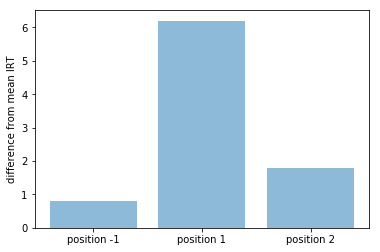

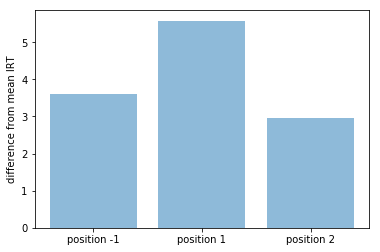

In [190]:
import matplotlib.pyplot as plt
import numpy as np

from data.animals import ANIMAL_TO_CATEGORIES
from sample_rw_lists import sample1, sample2


def generate_plot(triple_averages):
    """
    triple_averages: list of length three representing the difference in mean IRTs at "patch switch"
        positions compared to the overall mean IRT.
        The order should be (position -1, position 1, position 2).
        
    Generate a bar graph of triple_averages.
    """
    y_positions = np.arange(len(triple_averages))
    plt.bar(y_positions, triple_averages, align='center', alpha=0.5)
    plt.xticks(y_positions, ['position -1', 'position 1', 'position 2'])
    plt.ylabel('difference from mean IRT')
    plt.show()


def graph_patch_switches(walks):
    """
    walks: list of list of tuple. Each inner list represents a walk. Each tuple in a walk
        should be of the format (item, IRT), where item is a string representing a valid animal
        in a walk and IRT is an integer indicating the time between this item and the previous one.
    
    Generate a graph of the average difference between overall mean IRT of a walk, and the mean IRT
    at each of three patch switch positions:
        position -1 corresponds to the items just before the first item in a patch switch, 
        position 1 corresponds to the first items in a patch switch, 
        position 2 corresponds to the items in the next position following those in position 1,
            when those next items are in the same patch as the item in position 1.
    Compute the mean IRT for each of the three positions, and the difference between those means
        and the overall mean IRT of each walk.
    Calculate the mean of these differences across all the random walks and plot those using the
        generate_plot function defined above.
    """
    
    averages = []
    
    for walk in walks:
        
        position_neg = []
        position_1 = []
        position_2 = []
        
        for index in range(len(walk) - 1):
            index += 1
        
            current_patch = ANIMAL_TO_CATEGORIES[walk[index][0]]
            previous_patch = ANIMAL_TO_CATEGORIES[walk[index - 1][0]]
            
            if set(current_patch).intersection(previous_patch) == set():
                position_neg.append(walk[index - 1][1])
                position_1.append(walk[index][1])
                if index + 1 < len(walk):
                    position_2.append(walk[index + 1][1])
            
        mIRT = 0
        for step in walk:
            mIRT += step[1]

        mIRT = mIRT / len(walk)

        neg_avg = 0

        for step in position_neg:
            neg_avg += step
        if neg_avg != 0:
            neg_avg = neg_avg / len(position_neg)


        avg_1 = 0

        for step in position_1:
            avg_1 += step
        if avg_1 != 0:
            avg_1 = avg_1 / len(position_1)

        avg_2 = 0

        for step in position_2:
            avg_2 += step
        if avg_2 != 0:
            avg_2 = avg_2 / len(position_2)


        neg_mean_dif = abs(mIRT - neg_avg)
        mean_dif_1 = abs(mIRT - avg_1)
        mean_dif_2 = abs(mIRT - avg_2)

        averages.append([neg_mean_dif, mean_dif_1, mean_dif_2])
            
    mean_neg = 0
    mean_1 = 0
    mean_2 = 0


    for i in range(len(averages)):
        mean_neg += averages[i][0]
        mean_1 += averages[i][1]
        mean_2 += averages[i][2]



    n = len(averages)
    generate_plot([mean_neg / n, mean_1 / n, mean_2 / n])
    
graph_patch_switches(sample1)

graph_patch_switches(sample2)


### (g)

Now call `graph_patch_switches` on a list of N walks generated using the graph from part a with `start = 'animal'` and `walk_length = 50`. Only include walks containing 6 or more valid animal items in your analysis. (More specifically, you should generate walks until you have N walks that contain at least 6 valid animal items.)

(i) Run your function with N=20 and show the graph.  Explain whether this matches the patch switch pattern seen in the human data and replicated by Abbott et al.

(ii) Now run your function 10 more times with N=20.  Discuss whether the graphs across these different runs show the same pattern consistently.  Please do not include these graphs in what you turn in.

(iii) Run your function two times with N=1000 random walks (this can take about 2 minutes each), and print the graphs for each of these two runs.  Explain whether the graphs match the patch switch pattern seen in the human data and replicated by Abbott et al.  Are the results consistent across the two runs?

In [ ]:
graph = get_swow_graph()

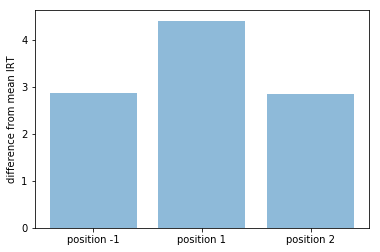

In [220]:
def testing(N):
    
    random_walks = []
        
    while len(random_walks) < 20:
        random_walk = weighted_random_walk(graph, 'animal', 50)
        IRT_list = get_animal_and_IRT(random_walk)
        
        if len(IRT_list[1]) > 5:
            random_walks.append(IRT_list[1])
    
    graph_patch_switches(random_walks)
        
#         if len(IRT_list) > 5:
#             print(IRT_list)
#             random_walks.append(IRT_list)
#     print(al)
    
testing(20)

The pattern is matches the patch switch pattern seen in the human data and replicated by Abbott et al, the position 2 is the lowest value, position -1 the middle value, and position 1 has the highest value.

Rerunning the above code, generates a variety of plots, sometimes position 2 is greater than position -1, yet position 1 is consistently the highest.

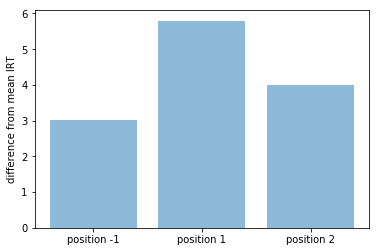

In [226]:
testing(1000)

Running the above code multiple times, generates a variety of different plots, yet the general impression is the same: position -1 is the smalles, position 1 is the largest, and position 2 is approximatly equal to position -1, sometimes a bit less, usually a bit more.

### (h)

Write a script to call `get_animals_and_IRT` from part e on 20 random walks of length 50 starting at 'animal'. Write your script so that each random walk contains at least 6 valid animal items. Make sure to clearly number walks 1 - 20.

In [239]:
i = 1
while i <= 20:
    random_walks = weighted_random_walk(graph, 'animal', 50)
    IRT_list = get_animal_and_IRT(random_walks)[1]
    if len(IRT_list) >= 6:
        print('Walk {0} \n {1} \n'.format(i, random_walks))
        i += 1

Walk 1 
 ['elephant', 'Africa', 'continent', 'Asia', 'continent', 'Europe', 'travel', 'go', 'run', 'exercise', 'bike', 'ride', 'horse', 'pony', 'horse', 'barn', 'animals', 'dog', 'cat', 'furry', 'animal', 'leopard'] 

Walk 2 
 ['horse', 'animal', 'dog', 'bark', 'dog', 'puppy', 'love', 'like', 'Facebook', 'social', 'butterfly', 'color', 'red', 'white', 'pure', 'innocent', 'baby', 'diaper', 'change', 'new', 'fresh', 'fish', 'food', 'drink', 'imbibe', 'drink', 'swallow', 'eat', 'now', 'how', 'why', 'who', 'how', 'when', 'date', 'calendar', 'days', 'time', 'hour', 'second', 'third', 'place', 'here', 'location', 'area', 'place', 'here', 'location', 'map', 'globe'] 

Walk 3 
 ['lion', 'king', 'monarch', 'ruler', 'measurement', 'height', 'high', 'mountain', 'top', 'above', 'over', 'cricket', 'bug', 'insect', 'bite', 'food', 'eat', 'hungry', 'thirsty', 'desert', 'sand', 'castle', 'stone', 'rock', 'music', 'sound', 'hear', 'noise', 'sound', 'hear', 'ears', 'face', 'mouth', 'face', 'off', 'dark'

### (i)

(i) Name three different aspects of the paths you see in part h which contribute to the length of a path and which are not simple, direct associations with animal words.  For example, paths such as cat=>pet=>goldfish or tiger=>stripes=>zebra seem to match our intuition about what might trigger chains of responses in human semantic fluency. But you almost certainly found some paths in which chains of associations are longer due to some interesting factors.  Please identify three of these and show an example of each from your paths.

(ii) Also, find a path that you think is particularly funny, and say why.

(iii) How does your inspection of the 20 paths you generated influence your assessment of the findings in Abbott et al.? 

### Question (i)

I find walk \#6 particulairly interesting, it displays two different types of patterns. First we go from 'grass' to 'ass' to 'hole' to 'ass' to 'donkey'. I hypothesize that we went from 'grass' to 'ass' because these two words rhyme with each other, i.e there is a phonological connection between them. Then we went from 'ass' to 'hole' (thinking of asshole) to 'ass' again, to finally 'donkey'. This is because of polysemy, the word 'ass' has two different meanings, the physiological ass, and the donkey. Another interesting pattern that I observed is that many paths include opposites of the current object, for example in walk 10 we go from 'female' to 'male', and then again later we go from 'small' to 'big'.

### Question (ii)

I find the following path particulairly funny "'friend', 'father', 'priest', 'pedophile'" because it is so surprising, a bit offensive, but also aware of current controversy.

### Question (iii)

My inspection of these 20 paths made me more confident in the findings of Abbott et al. We find many very realistic paths. I think a limitation may be that the path generator is memoryless. That following path demonstrates this well, "'bowl', 'round', 'fat'". The word 'bowl' would prime you to think of bowl like objects, even if you are 2 steps away, you'd be less likely to think of 'fat'. It would be interesting to run the random path selection experiment but with some sort of memory function that rather than picking a random (and weighted) connection, you pick a connection that leads to something which is in the same category as your current object. This would account for priming.